# 1) Load and Check Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("aug_train.csv")

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# 2) Variable Analysis

## 2.1) Categorical Variable Analysis

In [6]:
def categorical(columns):
    plt.figure(figsize = (17,7))
    plt.subplot(1, 2, 1)
    plt.pie(x = data[columns].value_counts(), labels = data[columns].value_counts().index, autopct="%.1f%%", pctdistance =0.7)
    plt.subplot(1, 2, 2)
    sns.countplot(x = columns, data = data, hue = "target")       
    plt.suptitle(columns)
    plt.show()

### Gender

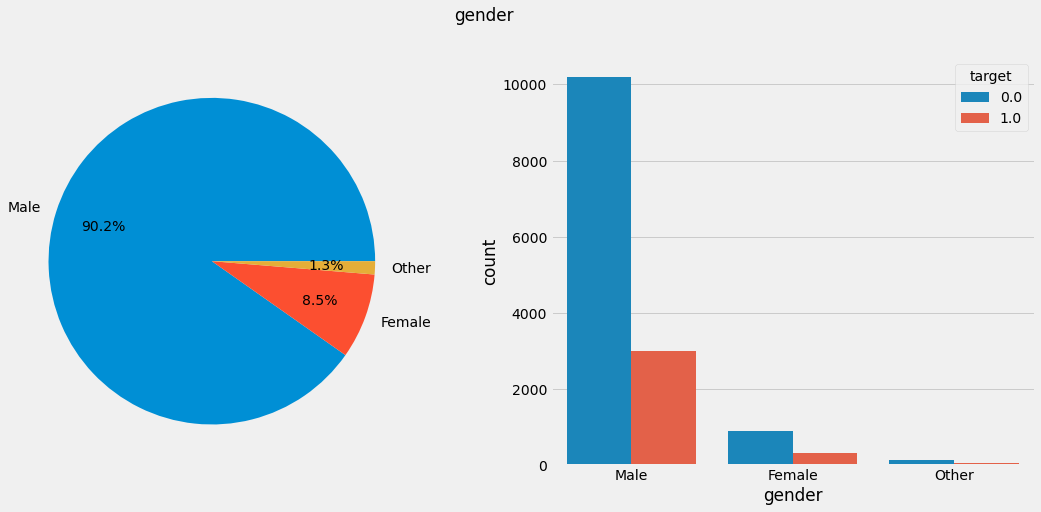

In [7]:
categorical("gender")

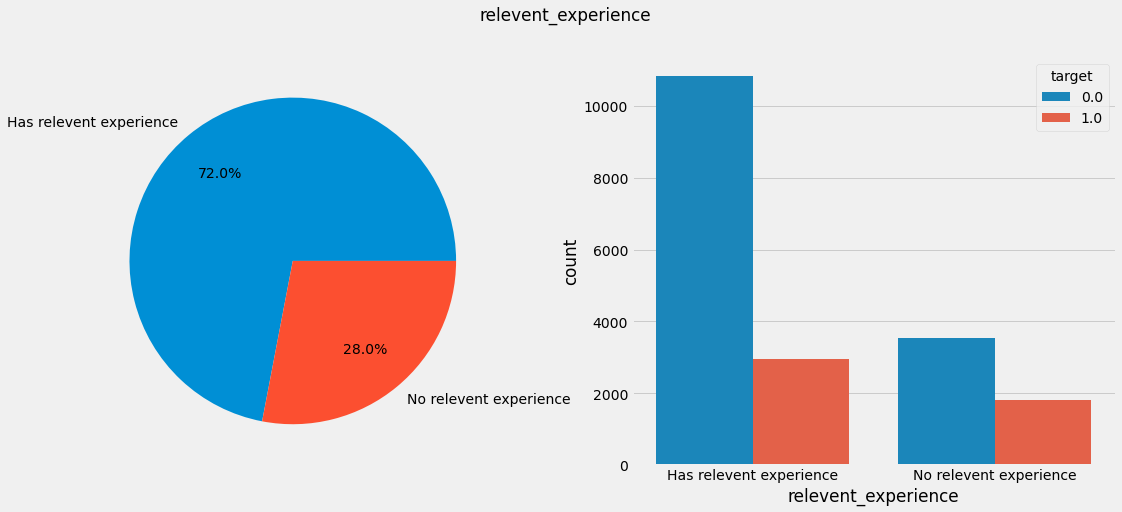

In [8]:
categorical("relevent_experience")

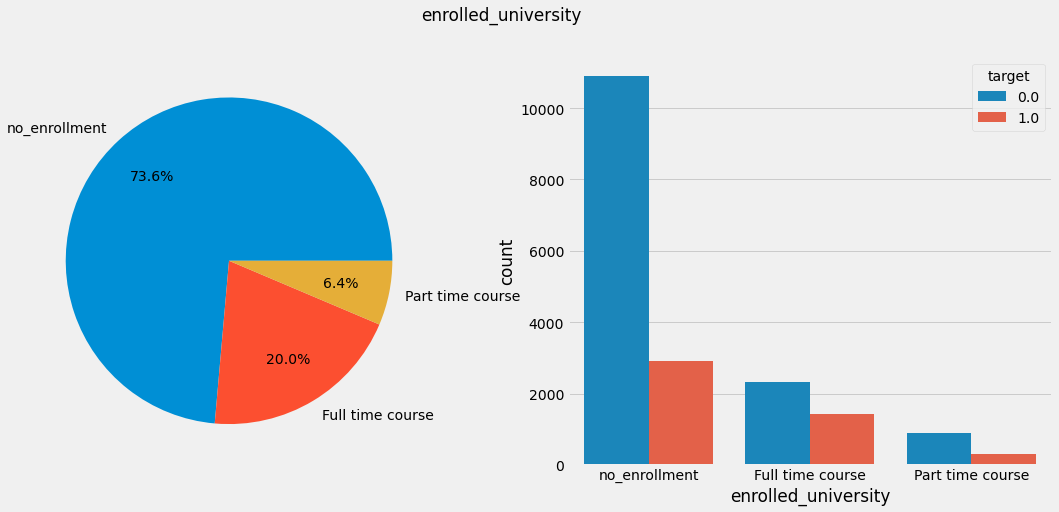

In [9]:
categorical("enrolled_university")

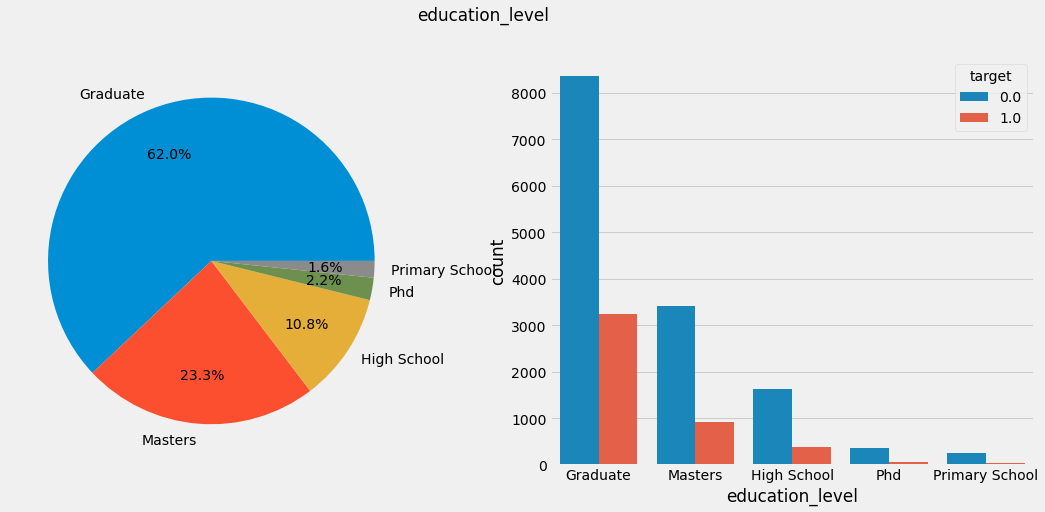

In [10]:
categorical("education_level")

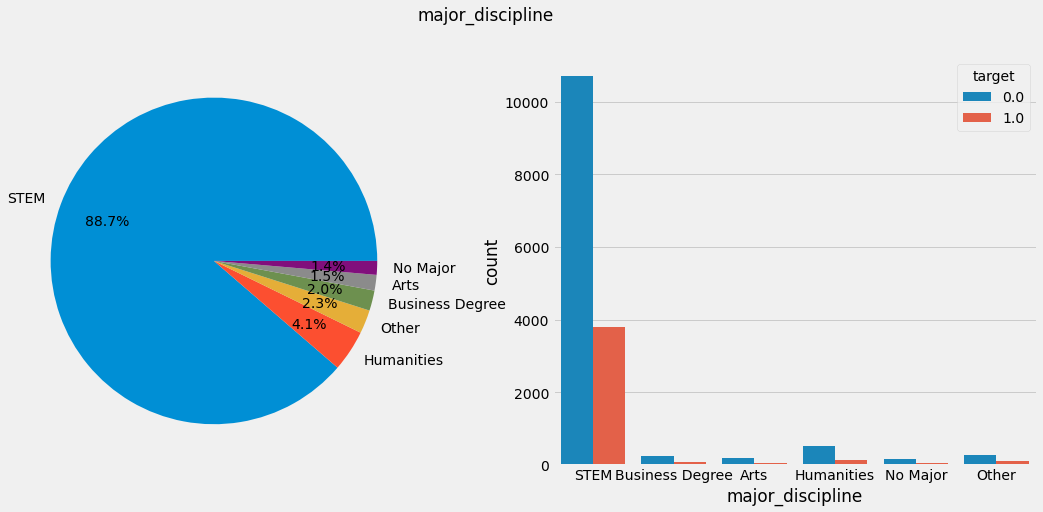

In [11]:
categorical("major_discipline")

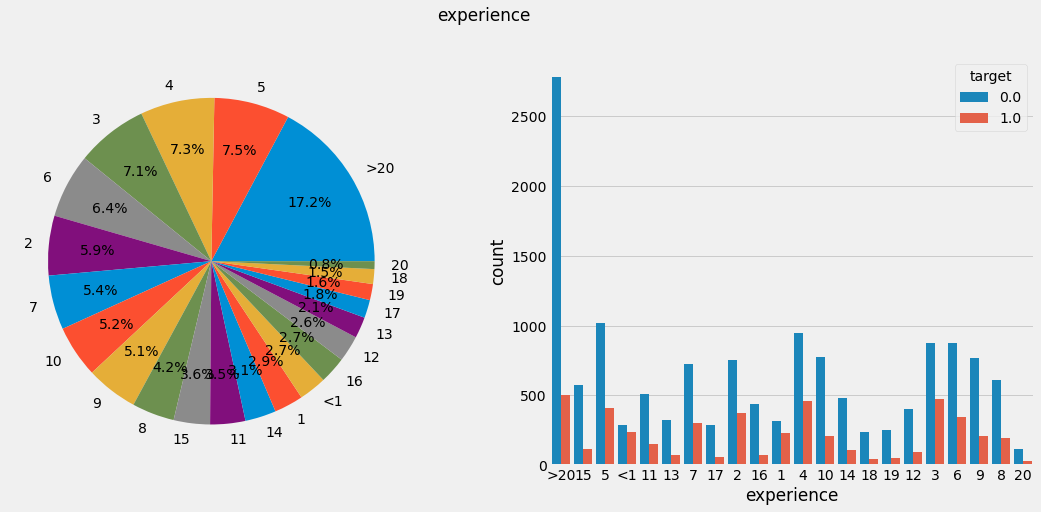

In [12]:
categorical("experience")

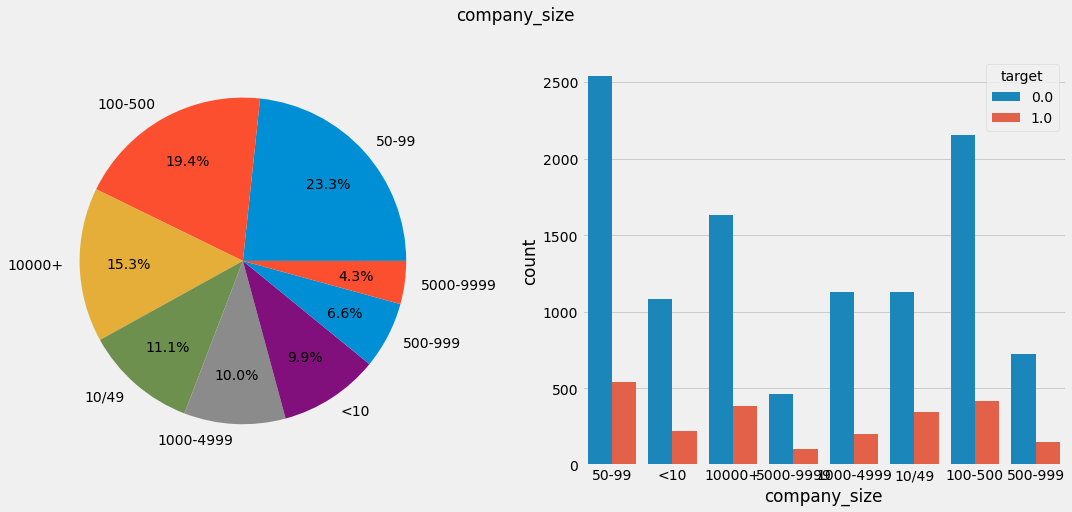

In [13]:
categorical("company_size")

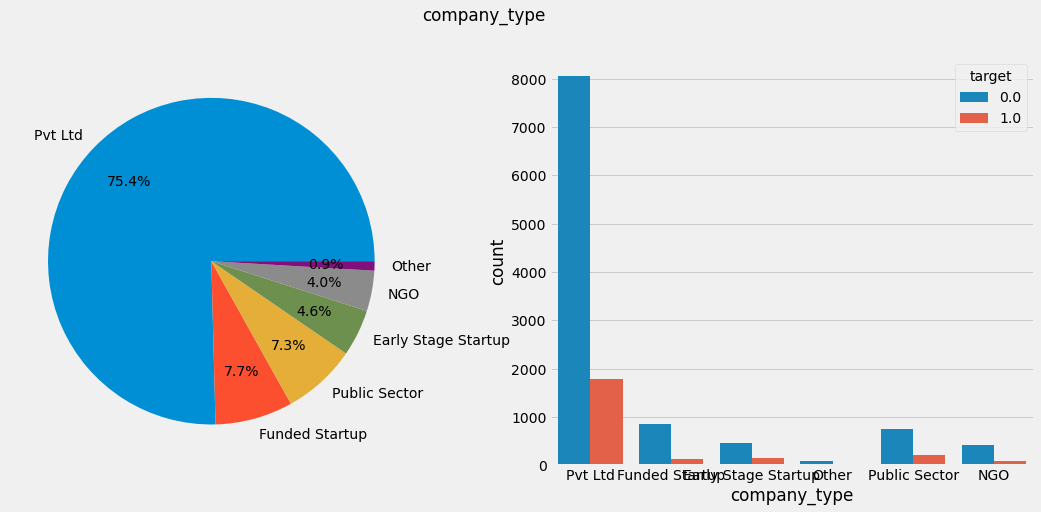

In [14]:
categorical("company_type")

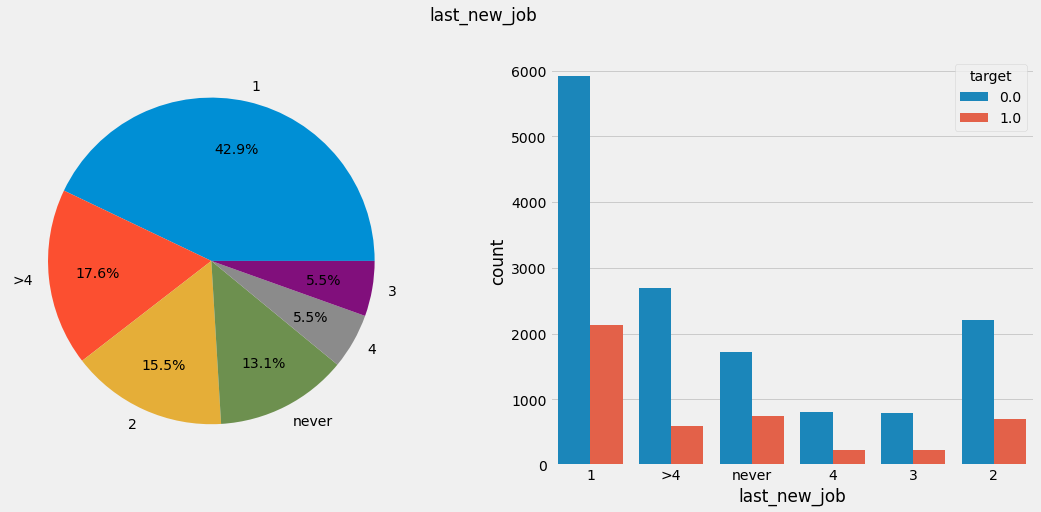

In [15]:
categorical("last_new_job")

# 3) Missing Value

In [16]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [17]:
col_name = ["gender", "enrolled_university", "education_level", "major_discipline", "experience",
           "company_size", "company_type", "last_new_job"]

In [18]:
for i in col_name :
    data[i].fillna(data[i].mode()[0], inplace = True)

In [19]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# 4) Data Preprocessing

In [20]:
#First of all we are going to drop unnecessary columns : city and enrollee_id
data.drop(["enrollee_id", "city"], axis = 1, inplace = True)

In [21]:
data.replace(to_replace = '<1', value = "0", inplace = True)
data.replace(to_replace = '>20', value = "21", inplace = True)
data.replace(to_replace = '>4', value = "5", inplace = True)
data.replace(to_replace = 'never', value = "0", inplace = True)

data.replace(to_replace = '<10',value = 'around_10',inplace=True)
data.replace(to_replace = '10/49',value = 'around_50',inplace=True)
data.replace(to_replace = '50-99',value = 'around_100',inplace=True)
data.replace(to_replace = '100-500',value = 'around_500',inplace=True)
data.replace(to_replace = '500-999',value = 'around_1000',inplace=True)
data.replace(to_replace = '1000-4999',value = 'around_5000',inplace=True)
data.replace(to_replace = '5000-9999',value = 'around_10000',inplace=True)
data.replace(to_replace = '10000+',value = 'more_than_10000',inplace=True)

In [22]:
#Label Encoder
le = LabelEncoder()
data["relevent_experience"] = le.fit_transform(data["relevent_experience"])

In [23]:
data = data.astype({'experience':int,'last_new_job':int})

In [24]:
# Dummies
education_df = pd.get_dummies(data[['education_level']],drop_first=True,prefix=[None])
company_size_df = pd.get_dummies(data[['company_size']],drop_first=True,prefix=[None])
company_type_df = pd.get_dummies(data[['company_type']],drop_first=True,prefix=[None])
major_df = pd.get_dummies(data[['major_discipline']],drop_first=True,prefix=[None])
university_df = pd.get_dummies(data[['enrolled_university']],drop_first=True,prefix=[None])
gender_df = pd.get_dummies(data[['gender']],drop_first=True,prefix=[None])

In [25]:
# drop original columns
data.drop(['education_level','company_size','company_type','major_discipline','enrolled_university', "gender"],axis=1,inplace=True)

In [26]:
data

,city_development_index,relevent_experience,experience,last_new_job,training_hours,target
0,0.920,0,21,1,36,1.0
1,0.776,1,15,5,47,0.0
2,0.624,1,5,0,83,0.0
3,0.789,1,0,0,52,1.0
4,0.767,0,21,4,8,0.0
...,...,...,...,...,...,...
19153,0.878,1,14,1,42,1.0
19154,0.920,0,14,4,52,1.0
19155,0.920,0,21,4,44,0.0
19156,0.802,0,0,2,97,0.0


In [27]:
df = pd.concat([data,education_df,company_size_df,company_type_df,major_df,university_df,gender_df],axis=1) 

In [28]:
df

,city_development_index,relevent_experience,experience,last_new_job,training_hours,target,High School,Masters,Phd,Primary School,...,Pvt Ltd,Business Degree,Humanities,No Major,Other,STEM,Part time course,no_enrollment,Male,Other
0,0.920,0,21,1,36,1.0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,0.776,1,15,5,47,0.0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,0.624,1,5,0,83,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0.789,1,0,0,52,1.0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
4,0.767,0,21,4,8,0.0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,1,14,1,42,1.0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
19154,0.920,0,14,4,52,1.0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
19155,0.920,0,21,4,44,0.0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
19156,0.802,0,0,2,97,0.0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0


# 5) ML Models

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [39]:
x = df.drop(["target"], axis = 1).values
y = df.target.values.reshape(-1,1)

<AxesSubplot:xlabel='target', ylabel='count'>

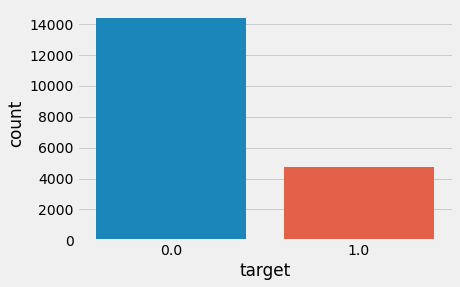

In [40]:
#Let's see weather our dataset is balanced or imbalanced
sns.countplot(df.target)

We can see that our dataset is imbalanced dataset.We are going to use smote technique to deal with our imablanced datase

In [41]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x,y)

<AxesSubplot:ylabel='count'>

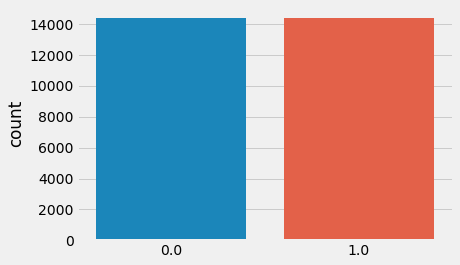

In [42]:
sns.countplot(y_smote)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2 ,random_state = 42)

In [45]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
# XGBClassifier

In [48]:
clf = XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

gr =GridSearchCV(estimator = clf,
                 param_grid = params,
                 cv=5,
                 scoring='accuracy',
                 n_jobs=-1,
                 verbose=1)
model = gr.fit(x_train,y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 10.9min finished


In [49]:
print("Model Best Score:", model.best_score_)
print("Model Best Estimator:", model.best_estimator_)

Model Best Score: 0.8467555897613475
Model Best Estimator: XGBClassifier(colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5,
              subsample=0.6)


In [52]:
y_head = model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_head))

Test Accuracy: 0.8409525464974795


In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

<AxesSubplot:>

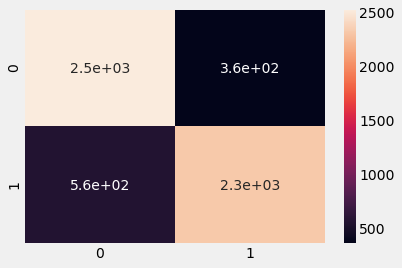

In [54]:
sns.heatmap(cm, annot = True)